Column names in dataset: Index(['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph',
       'RAINFALL', 'STATE', 'CROP', 'EC', 'OC', 'S', 'Zn', 'Fe', 'Cu', 'Mn',
       'B'],
      dtype='object')
The Shape of the Dataset is: (2200, 17)
N_SOIL           int64
P_SOIL           int64
K_SOIL           int64
TEMPERATURE    float64
HUMIDITY       float64
ph             float64
RAINFALL       float64
STATE           object
label           object
EC             float64
OC             float64
S              float64
Zn             float64
Fe             float64
Cu             float64
Mn             float64
B              float64
dtype: object
            N_SOIL       P_SOIL       K_SOIL  TEMPERATURE     HUMIDITY  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.8

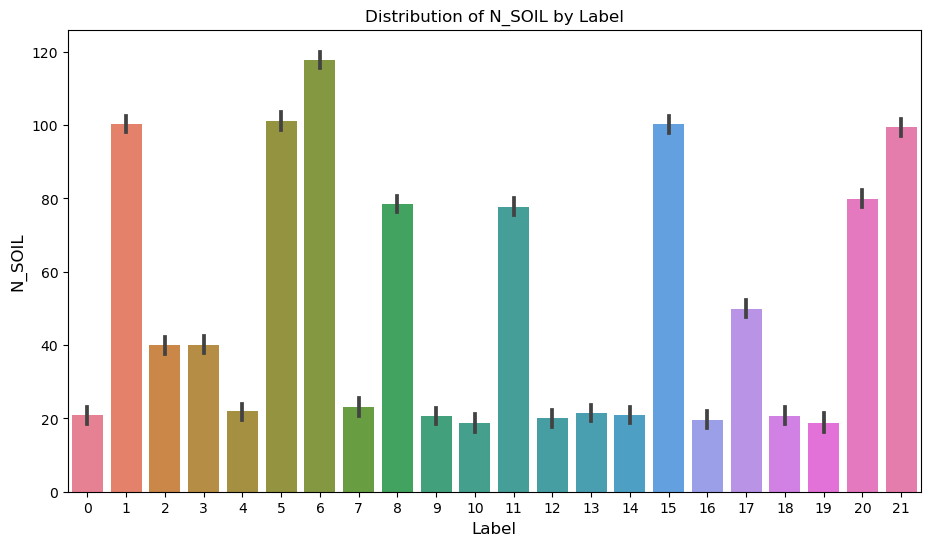

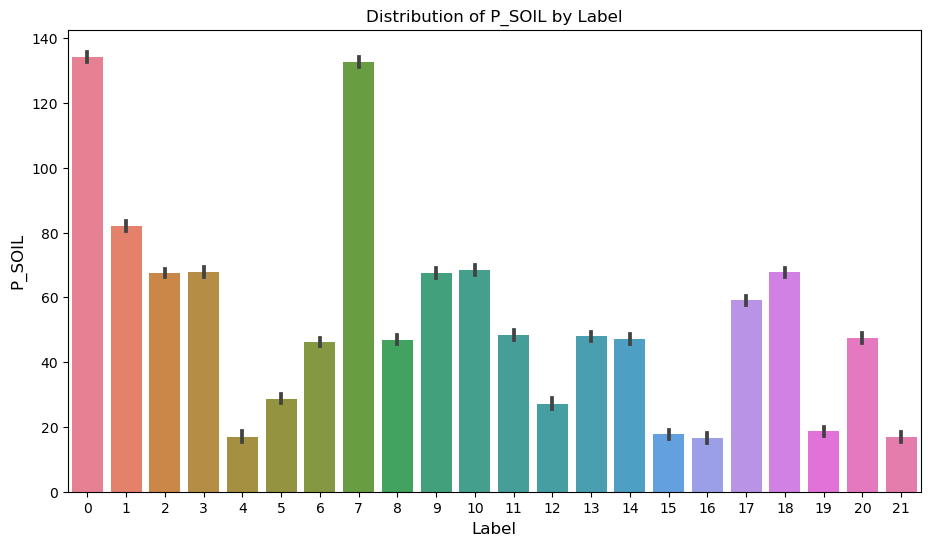

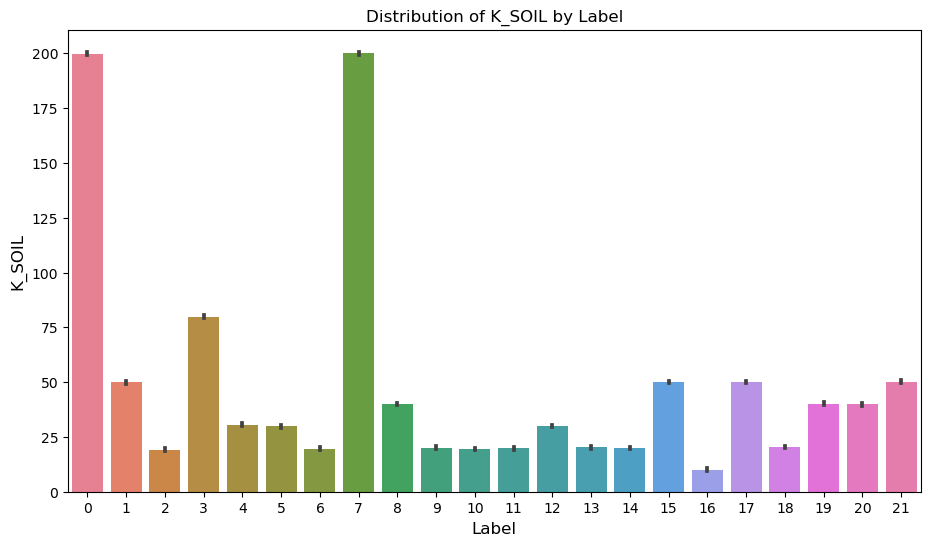

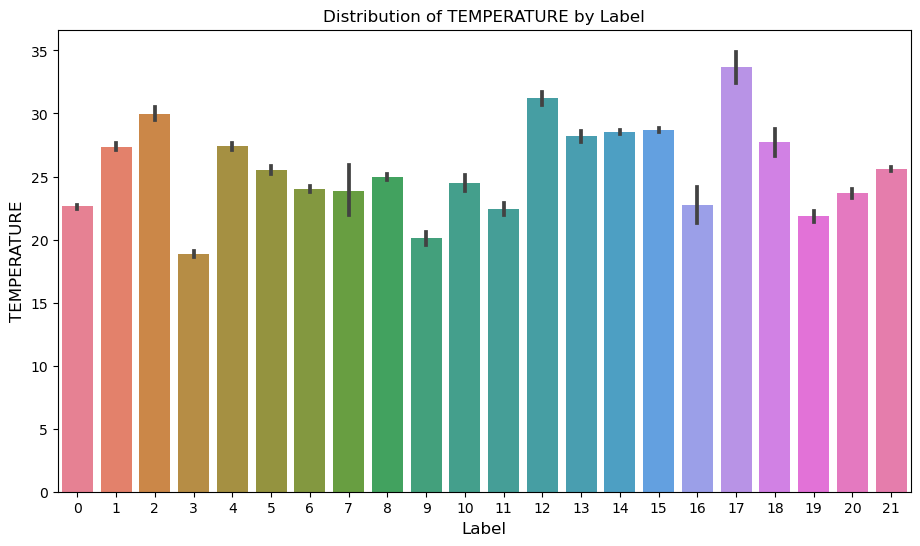

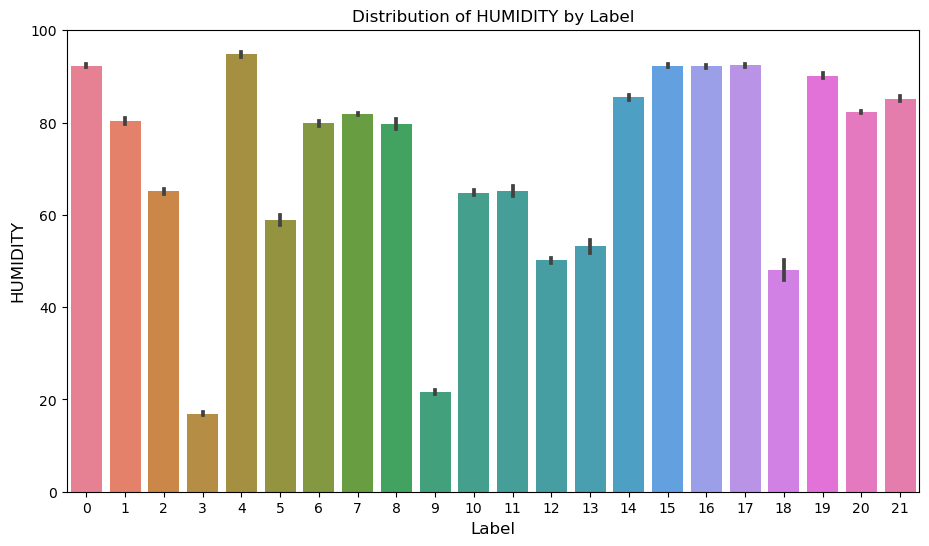

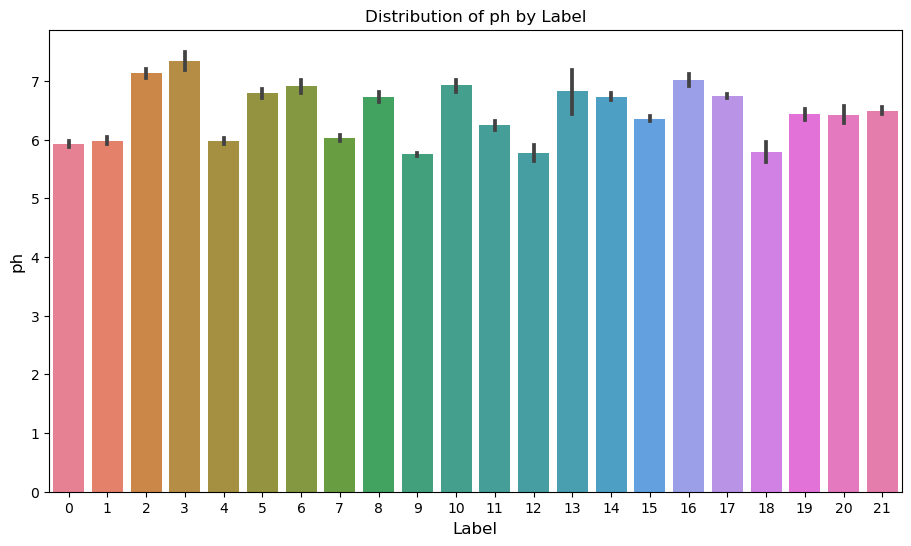

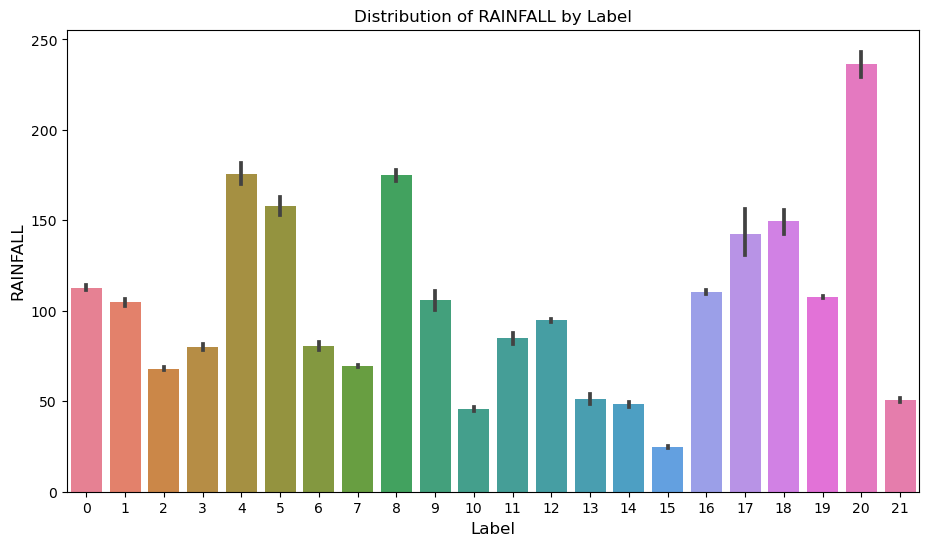

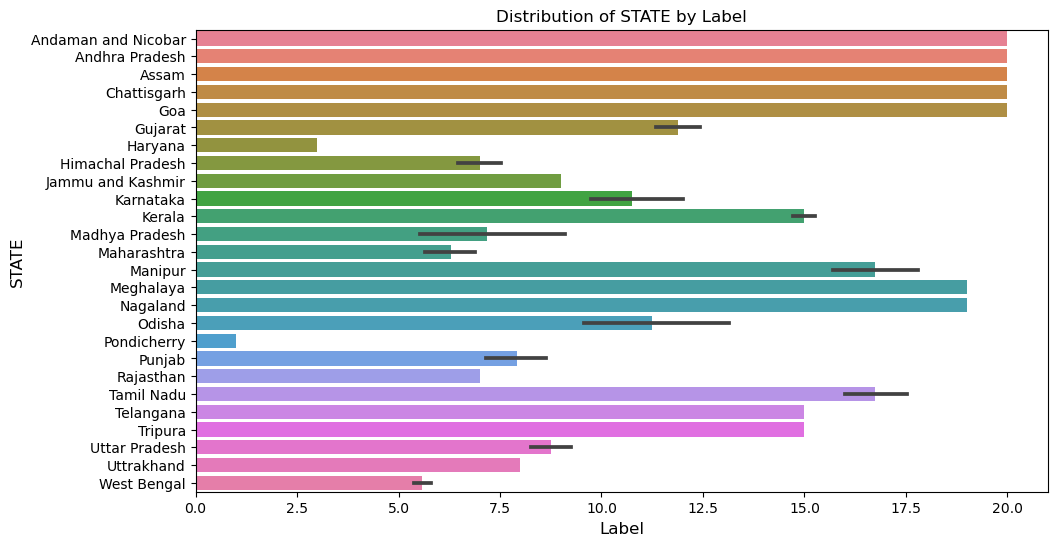

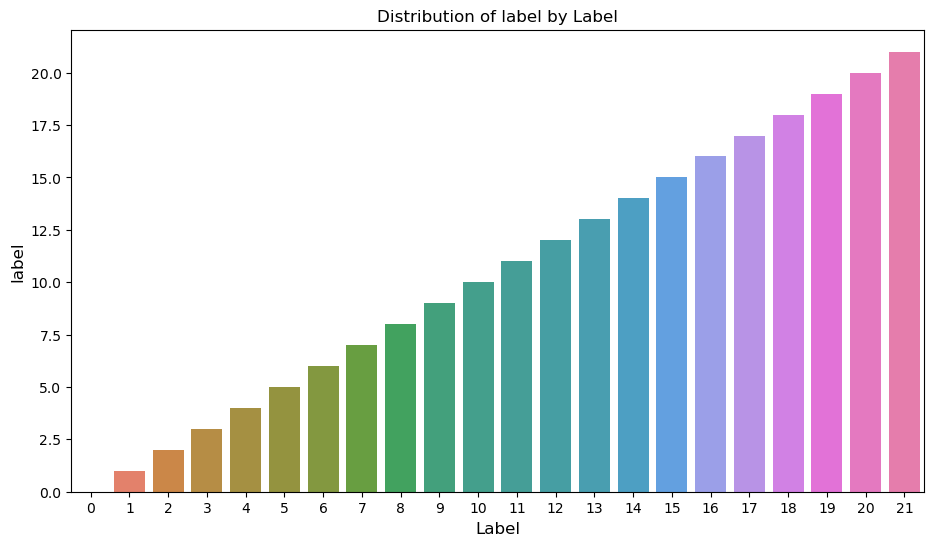

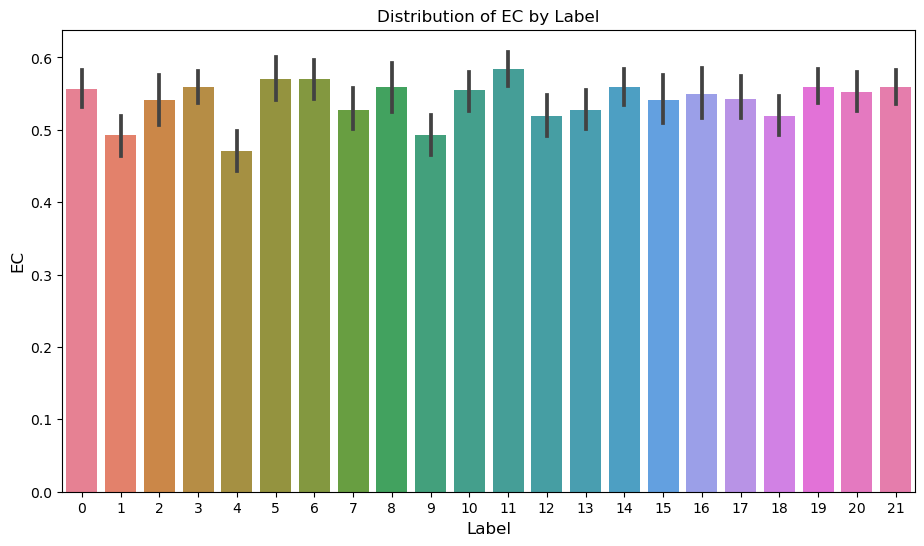

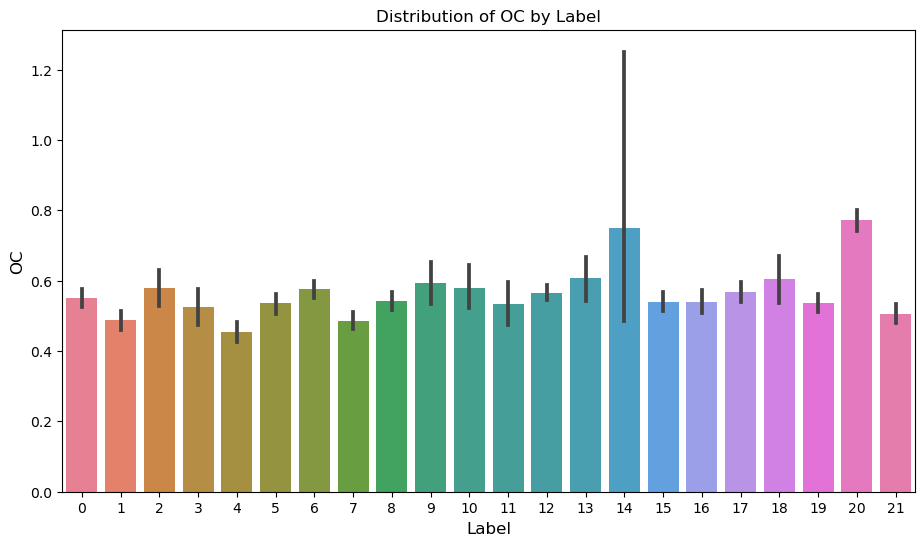

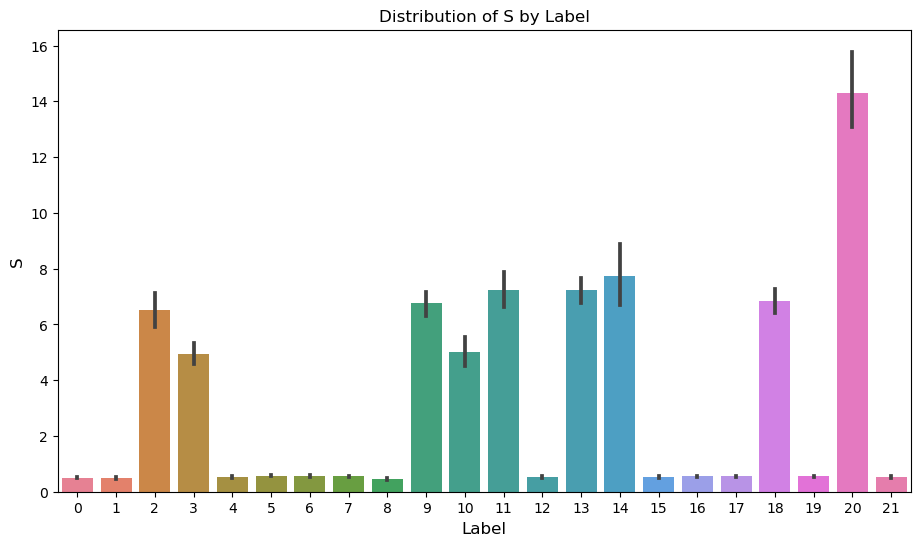

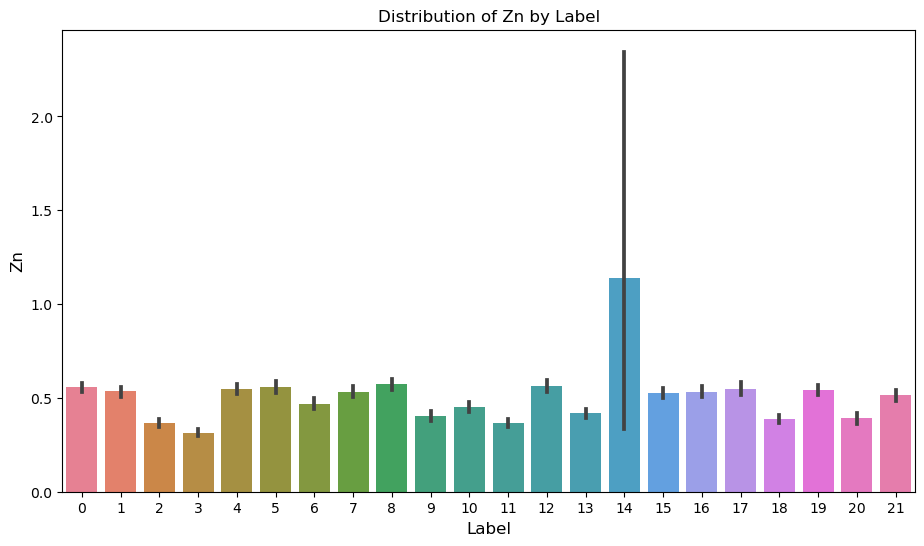

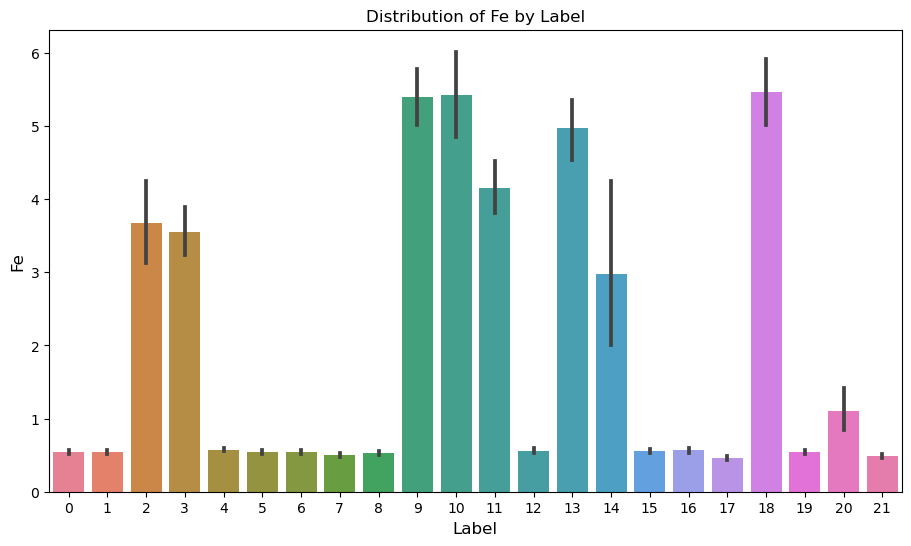

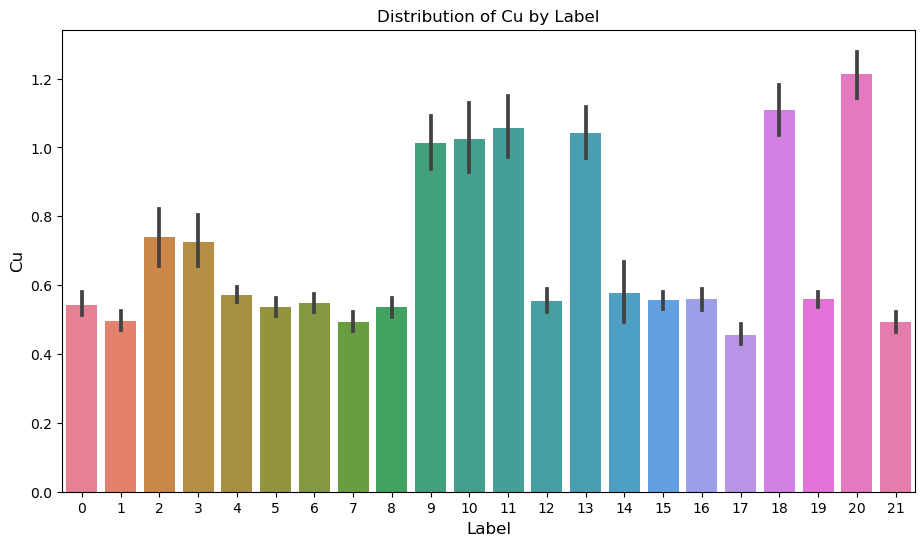

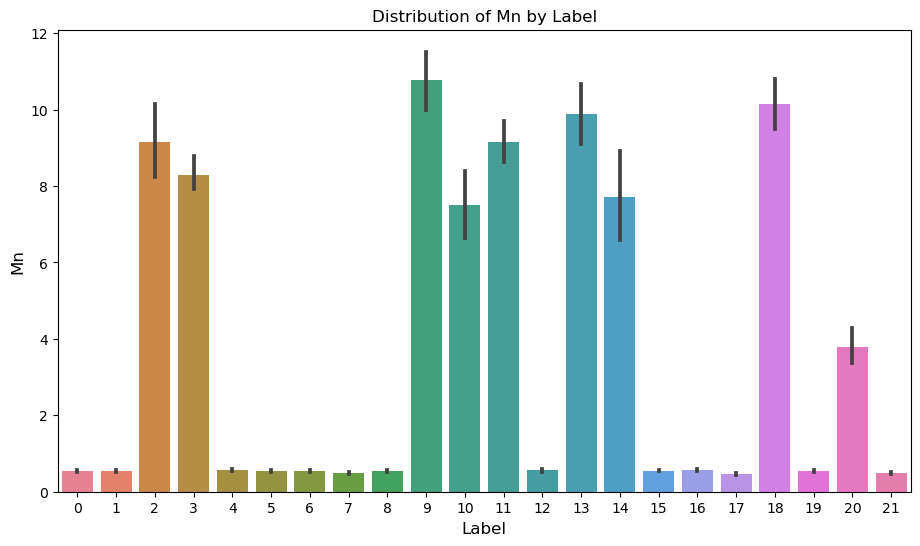

ValueError: could not convert string to float: 'Uttar Pradesh'

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load dataset
dt = pd.read_csv("C:\\Users\\shres\\Downloads\\datasets\\Indiacrop_dataset.csv", encoding="utf-8")

# Debug: Print column names
print("Column names in dataset:", dt.columns)

# Rename column if necessary
if 'label' not in dt.columns:
    for col in dt.columns:
        if col.lower() in ["label", "crop", "target"]:  # Check alternative names
            dt.rename(columns={col: "label"}, inplace=True)

# If label column is still missing, assign the last column as label
if 'label' not in dt.columns:
    print("Warning: 'label' column not found! Using last column as label.")
    dt['label'] = dt.iloc[:, -1]

print("The Shape of the Dataset is: {}".format(dt.shape))
print(dt.dtypes)
print(dt.describe())
print("Number of labels: {}".format(dt['label'].nunique()))
print(dt.isnull().sum())
print(dt.isnull().any())

# Encode labels
ld = LabelEncoder()
dt["label"] = ld.fit_transform(dt["label"])

# Splitting dataset
X = dt.iloc[:, :-1]
y = dt.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data visualization
columns = dt.columns[:-1]
for column in columns:
    plt.figure(figsize=(11, 6))
    sns.barplot(x='label', y=column, data=dt, palette='husl')
    plt.xlabel('Label', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f"Distribution of {column} by Label")
    plt.show()

# Gradient Boosting Classifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
predictions = model.predict(X_test)
print("Train accuracy:", accuracy_score(y_train, ypred_train))
print("Test accuracy:", accuracy_score(y_test, predictions))

scores = cross_val_score(model, X, y, cv=5)
print("Cross Validation Score:", scores.mean())

# AdaBoost Classifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
predictions = model.predict(X_test)
print("Train accuracy:", accuracy_score(y_train, ypred_train))
print("Test accuracy:", accuracy_score(y_test, predictions))

scores = cross_val_score(model, X, y, cv=5)
print("Cross Validation Score:", scores.mean())

# GridSearchCV for AdaBoost
estimator = AdaBoostClassifier(random_state=0)
param_grid = {"n_estimators": list(range(1, 51))}
grid = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

# Fine-tuned AdaBoost
model = AdaBoostClassifier(n_estimators=grid.best_params_['n_estimators'])
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
predictions = model.predict(X_test)
print("Train accuracy:", accuracy_score(y_train, ypred_train))
print("Test accuracy:", accuracy_score(y_test, predictions))

scores = cross_val_score(model, X, y, cv=5)
print("Cross Validation Score:", scores.mean())

# XGBoost Classifier
model = XGBClassifier()
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
predictions = model.predict(X_test)
print("Train accuracy:", accuracy_score(y_train, ypred_train))
print("Test accuracy:", accuracy_score(y_test, predictions))

scores = cross_val_score(model, X, y, cv=5)
print("Cross Validation Score:", scores.mean())

print(dt.columns)  # Print column names

# Model Accuracy Visualization
models = ['RF', 'GB', 'AB', 'XGB']
accuracy = [99.77, 99.09, 17.27, 99.31]
plt.bar(models, accuracy, color='maroon', width=0.5)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of Crop Recommendation")
plt.show()

# Line plot for accuracy comparison
plt.plot(models, accuracy, marker='o', linestyle='-')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of Crop Recommendation")
plt.show()
